In [1]:
import numpy as np
import numpy.linalg as la

from scipy.stats import norm
import matplotlib.pyplot as plt

import time

# Section 2.3

## Figure 4

${\boldsymbol \mu}_1 = {\bf 0}$, ${\boldsymbol \mu}_2 = (1, \ldots, 1, 0, \ldots, 0)^T$ whose first $\lceil tr({\bf \Sigma}_1^2) \rceil$ elements are 1.

${\bf \Sigma}_1 = {\bf B} (0.3^{|i - j|^{1/3}}) {\bf B}$ and ${\bf \Sigma}_2 = 1.2 {\bf B} (0.3^{|i - j|^{1/3}}) {\bf B}$

$(n_1, n_2) = (\log_2p, 2 \log_2p), p = 2^s, s = 3, \ldots, 14,$

In [2]:
np.random.seed(0)
t1 = time.time()

c = [1, 1.2]
N_class = 2
N_dim = 12
iter = 2000
result = np.zeros((N_dim, N_class))
line = np.zeros((N_dim, N_class))

for s in range(N_dim):
  p = 2**(s + 3)
  print('Dimension:{}'.format(p))
  print('Calculating...')
  
  n = [int(np.log2(p)), int(2 * np.log2(p))]

  #create Sigma
  Sigma, P, Q = [], [], []
  S = np.zeros((p, p))
  for i in range(p):
    for j in range(p):
      S[i, j] = (1/2 + (i+1) / (p+1))**(1/2) * 0.3**(np.abs(i - j)**(1/3)) * (1/2 + (j + 1) / (p + 1))**(1/2)
      
  for i in range(N_class):
    Sigma.append(c[i] * S)
    value, vec = la.eig(Sigma[i])
    P.append(np.sqrt(value)); Q.append(vec.T)
    
  #create mu
  mu = []
  N_one = int(np.ceil(np.trace(np.dot(Sigma[0], Sigma[0]))**(1/2)))
  mu.append(np.zeros(p))
  mu.append(np.r_[np.ones(N_one), np.zeros(p - N_one)]) 
  
  #create delta and Delta
  Delta = la.norm(mu[0] - mu[1])**2  
  delta = []
  for i in range(N_class):
    delta.append((np.trace(np.dot(Sigma[i], Sigma[i])) / n[i] + np.trace(np.dot(Sigma[i], Sigma[-(i+1)])) / n[-(i+1)] \
                 + np.trace(np.dot(Sigma[0], Sigma[0])) / (2 * n[0] * (n[0] - 1)) + np.trace(np.dot(Sigma[1], Sigma[1])) / (2 * n[1] * (n[1] - 1)))**(1/2))
    
    line[s, i] = norm.cdf(- Delta / (2 * delta[i]), loc=0, scale=1)

    
    
  for l in range(iter):
    mean, trS =[], []
    x = []
    for i in range(N_class):
      Z = np.array([P[i] * np.random.normal(0, 1, p) for j in range(n[i])])
      X = np.dot(Z, Q[i]) + mu[i]
      cov = np.cov(X, rowvar=False)

      mean.append(np.mean(X, axis=0))
      trS.append(np.trace(cov))

      # creat new data
      z = P[i] * np.random.normal(0, 1, p)
      x.append(np.dot(z, Q[i]) + mu[i])


    # DBDA
    for i in range(N_class):
      classifier = np.dot(x[i] - (mean[0] + mean[1]) / 2, mean[1] - mean[0]) - trS[0] / (2 * n[0]) + trS[1] / (2 * n[1])
      if (-1)**i * classifier < 0:
        result[s, i] += 1
        
        
  print('Result')
  print('(class1, class2) = ({}, {})'.format(result[s, 0], result[s, 1]))
  print('Finished')
  print('')


t2 = time.time() - t1
print('Calculation time:{: .3f}'.format(t2))


Dimension:8
Calculating...
Result
(class1, class2) = (1446.0, 1410.0)
Finished

Dimension:16
Calculating...
Result
(class1, class2) = (1453.0, 1432.0)
Finished

Dimension:32
Calculating...
Result
(class1, class2) = (1524.0, 1489.0)
Finished

Dimension:64
Calculating...
Result
(class1, class2) = (1566.0, 1514.0)
Finished

Dimension:128
Calculating...
Result
(class1, class2) = (1627.0, 1553.0)
Finished

Dimension:256
Calculating...
Result
(class1, class2) = (1610.0, 1597.0)
Finished

Dimension:512
Calculating...


KeyboardInterrupt: 

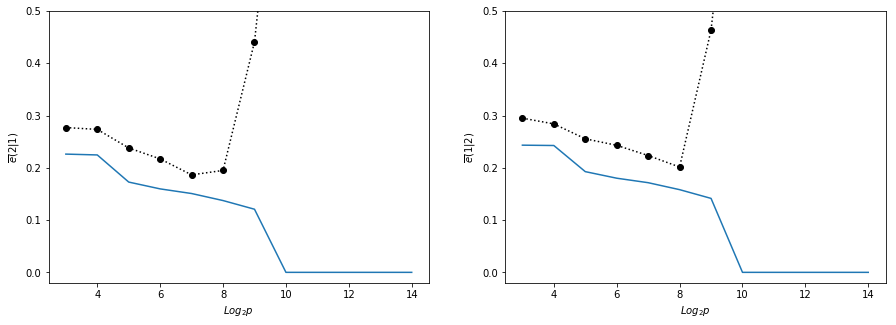

In [3]:
error = np.zeros((2, N_dim))
for i in range(N_dim):
  error[0, i] = 1 - result[i, 0] / iter
  error[1, i] = 1 - result[i, 1] / iter
  
pl = np.arange(3, 15, 1)
ylabel_list = ['$\overline{e}(2|1)$', '$\overline{e}(1|2)$']

plt.figure(figsize=(15, 5))
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.plot(pl, error[i], 'o:', color='black')
  plt.plot(pl, line.T[i])
  plt.ylim(-0.02, 0.5)
  plt.ylabel(ylabel_list[i])
  plt.xlabel('$Log_2p$')


## Figure 5

In [ ]:
np.random.seed(0)
t1 = time.time()

c = [1, 1.2]
N_class = 2
dim = [32, 1024]
N_dim = len(dim)
index = [0, 1]
iter = 2000
result = np.zeros((N_dim,  N_class, iter))
Delta = np.zeros(N_dim)
delta = np.zeros((N_dim, N_class))

for p, pc in zip(dim, index):
  print('Dimension:{}'.format(p))
  print('Calculating...')
  
  n = [int(np.log2(p)), int(2 * np.log2(p))]

  #create Sigma
  Sigma, P, Q = [], [], []
  S = np.zeros((p, p))
  for i in range(p):
    for j in range(p):
      S[i, j] = (1/2 + (i+1) / (p+1))**(1/2) * 0.3**(np.abs(i - j)**(1/3)) * (1/2 + (j + 1) / (p + 1))**(1/2)
      
  for i in range(N_class):
    Sigma.append(c[i] * S)
    value, vec = la.eig(Sigma[i])
    P.append(np.sqrt(value)); Q.append(vec.T)
    
  #create mu
  mu = []
  N_one = int(np.ceil(np.trace(np.dot(Sigma[0], Sigma[0]))**(1/2)))
  mu.append(np.zeros(p))
  mu.append(np.r_[np.ones(N_one), np.zeros(p - N_one)]) 
  
  #create delta and Delta
  Delta[pc] = la.norm(mu[0] - mu[1])**2  
  for i in range(N_class):
    delta[pc, i] = (np.trace(np.dot(Sigma[i], Sigma[i])) / n[i] + np.trace(np.dot(Sigma[i], Sigma[-(i+1)])) / n[-(i+1)] \
                 + np.trace(np.dot(Sigma[0], Sigma[0])) / (2 * n[0] * (n[0] - 1)) + np.trace(np.dot(Sigma[1], Sigma[1])) / (2 * n[1] * (n[1] - 1)))**(1/2)

  
  
  for l in range(iter):
    mean, trS =[], []
    x = []
    for i in range(N_class):
      Z = np.array([P[i] * np.random.normal(0, 1, p) for j in range(n[i])])
      X = np.dot(Z, Q[i]) + mu[i]
      cov = np.cov(X, rowvar=False)

      mean.append(np.mean(X, axis=0))
      trS.append(np.trace(cov))

      # creat new data
      z = P[i] * np.random.normal(0, 1, p)
      x.append(np.dot(z, Q[i]) + mu[i])


    # DBDA
    for i in range(N_class):
      result[pc, i, l] = np.dot(x[i] - (mean[0] + mean[1]) / 2, mean[1] - mean[0]) - trS[0] / (2 * n[0]) + trS[1] / (2 * n[1])
        
  print('Finished')
  print('')


t2 = time.time() - t1
print('Calculation time:{: .3f}'.format(t2))


Dimension:32
Calculating...
Finished

Dimension:1024
Calculating...


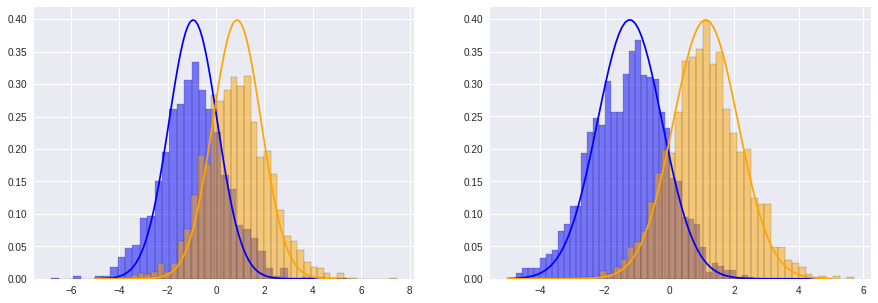

In [99]:
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(15, 5))
color_list = ['blue', 'orange']

for i in range(2):
  PDF = []
  plt.subplot(1, 2, i+1)
  for j in range(2):
    PDF.append(norm.pdf(x, loc=(-1)**(j+1) * Delta[i]/(2*delta[i, j]), scale=1)) 
  
    plt.plot(x, PDF[j], color=color_list[j])
    plt.hist(result[i, j] / delta[i, j], bins=40, color=color_list[j], alpha=.5, normed=True, ec='black')
  
  

